# Обработка естественного языка(NLP)
---

## Наивный Байесовский алгоритм

**Наивный Байес - это целый набор алгоритмов**, применяющих теорему Байеса для задач классификации. Это алгоритмы обучения с учителем(supervised learning), т.е. работают на размеченных данных.

**Теорема Байеса - это формула вероятностей**, вычисляющая вероятности связанных событий на основе уже известных вероятностей.

*Вероятность возникновения события A при условии, что возникает событие B равна вероятности события B при условии, что возникает событие A умножить на вероятность события A и разделить на вероятность события B.*

$$P(A|B)  = \frac{P(B|A)*P(A)}{P(B)}$$

В этой формуле:
* $A$ и $B$ - это события
* $P(A|B)$ - вероятность события A при условии, что событие B произошло *(условная вероятность)*
* $P(B|A)$ - вероятность события B при условии, что событие A произошло *(условная вероятность)*
* $P(A)$ - вероятность события A
* $P(B)$ - вероятность события B

### Рассмотрим на примере

Представим следующую ситуацию в городах:

В каждой квартире в домах установлены датчики противопожарной сигнализации. Однако, бывают ложные срабатывания - датчик выдаёт сигнал о наличии дыма, хотя настоящего пламени нет(например - дым от пригоревшей еды на плите). 

**Вопрос** - какова вероятность того, что при срабатывании датчика действительно имеет место пожар?

**Вероятности различных событий:**
* Настоящие опасные возгорания случаются только в 1% случаев
* Датчики дыма - некачественные, они срабатывают только в 10% случаев
* Когда действительно случилось возгорание, то датчик срабатывает в 95% случаев

**В терминах событий и вероятностей:**  
* Событие $A$: Опасное возгорание
* Событие $B$: Сработал датчик дыма
* $P(A|B)$: Вероятность возгорания, если сработал датчик дыма
* $P(B|A)$: Вероятность срабатывания датчика, если возгорание опасное

**Вероятности различных событий:**
* Настоящие опасные возгорания случаются только в 1% случаев. **P(Fire)=1/100**
* Датчики дыма - некачественные, они срабатывают только в 10% случаев. **P(Smoke)=1/10**
* Когда действительно случилось возгорание, то датчик срабатывает в 95% случаев. **P(Smoke|Fire)=95/100**

Подставив вероятности различных событий в исходную формулу получим:
$$P(Fire|Smoke)= \frac{P(Smoke|Fire)*P(Fire)}{P(Smoke)}$$
$$P(Fire|Smoke)=\frac{0.95*0.01}{0.1}=9.5%$$

**Получается, что если был обноружен дым, то вероятность того, что это действительно пожар равна 9.5%.**

## Теорема Байеса для задач классификации данных

Для начала преобразуем теорему Байеса в модель машинного обучения для задачи классификации.

Мы моделируем вероятность принадлежности к классу при условии, что признаки принимают определённые значения.

$$P(A|B)  = \frac{P(B|A)*P(A)}{P(B)}$$

Мы будем рассматривать классы $C$ и набор признаков $x$. Получается, что мы ищем ответ на **вопрос** - какова вероятность того или иного класса $C$ при условии, что признаки принимают значения $x$.
$$P(C_k|x)  = \frac{P(x|C_k)*P(C_k)}{P(x)}\text{, где }x=(x_1, ..., x_n)$$

У нас N признаков, а также K классов. Необходимо найти вероятность принадлежности к тому или иному классу при условии, что признаки принимают определённые значения, для этого перепишем формулу. 

Так как числитель равен совместной вероятности - можно заменить две отдельные вероятности на совместную вероятность, когда встречается класс $C_k$ и признаки $(x_1, ..., x_n)$:
$$p(C_k|x)  = \frac{p(C_k,x_1,...,x_n)}{p(x)}$$

Далее можно сделать следующее - можно переписать эту формулу в **набор из серии вероятностей**, где на каждом шаге будем брать **вероятность отдельного признака при условии, что остальные признаки и класс $C_k$ принимают соответствующие значения**.
$$\begin{align}
p(C_k,x_1,...,x_n) &= p(x_1, ..., x_n, C_k) \\ 
&= p(x_1|x_2, ..., x_n, C_k)p(x_2, ..., x_n, C_k) \\
&= p(x_1|x_2, ..., x_n, C_k)p(x_2|x_3, ..., x_n, C_k)p(x_3, ..., x_n, C_k) \\
&= \dots \\
&= p(x_1|x_2, ..., x_n, C_k)p(x_2|x_3, ..., x_n, C_k)\dots p(x_{n-1}|x_n, C_k)p(x_n|C_k)p(C_k)
\end{align}$$

Сначала берётся вероятность **всего набора и класс $C_k$** $\text{ }p(x_1, ..., x_n, C_k)$.   
Далее эта формула разбивается на две части:
1. $p(x_1|x_2, ..., x_n, C_k)$ - это условная вероятность
2. $p(x_2, ..., x_n, C_k)$ - вероятность события, которое указано в качестве условия для $x_1$  

После этого, делается всё то же самое до тех пор, пока не дойдём до признака $x_n$.  
Таким образом, получаем формулу из множества вероятностей, которые умножаются друг на друга и в конце также происходит умножение на вероятность класса $C_k$.

Далее мы предположим, что все признаки $X$ являются **независимыми друг от друга**(поэтому алгоритм - *наивный*, во многих задачах такое предположение действительно наивно), что позволит переписать формулу следующим образом:$$p(x_i|x_{i+1},\dots,x_n,C_k)=p(x_i|C_k)$$

*Когда мы будем говорить о текстовых документах, то отдельные слова в документе будут отдельными признаками.* Насколько разумно такое предположение? 

Если сделать такое предположение, то такой подход на практике работает *достаточно* хорошо, т.е. в итоге можно получить вполне хорошие результаты классификации, хотя такое преположение и является *наивным*.

Далее формулу можно переписать следующим образом - убрать в условии все остальные признаки и оставить в условии только класс $C_k$. Для примера возьмём признаки $x_i$ и $x_{i+1}$. Поскольку, согласно нашему предположению, эти два признака независимы друг от друга, то вероятность $x_i$ никак не зависит от того, случилось ли событие $x_{i+1}$ или нет. Т.е. вероятность $x_i$ одинаковая в обоих случаях - если событие $x_{i+1}$ случилось или событие $x_{i+1}$ не случилось. Это означает, что мы можем не указывать $x_{i+1}$ в условной вероятности для $x_i$ и то же самое для других признаков.

Тогда формулу для модели Наивного Байеса можно переписать следующим образом(здесь $\propto$ - пропорционально):
$$\begin{align}
p(C_k,x_1,...,x_n) &\propto p(C_k,x_1, ..., x_n, C_k) \\ 
&\propto p(C_k)p(x_1|C_k)p(x_2|C_k)p(x_3|C_k) \dots \\
&\propto p(C_k)\prod_{i=1}^{n}p(x_i|C_k)
\end{align}$$

### Рассмотрим на примере

**Важно отметить, что существует множество вариаций модели Наивного Байеса, в том числе:**
* Мультиномиальная модель
* Модель Гаусса
* Комплементарная модель
* Модель Бернулли
* Категориальная модель

*Мы будем работать с мультиномиальной моделью, потому что она наиболее часто встречается в задачах обработки текста.*

**Представим, что необходимо создать сайт с отзывами о фильмах. Нужно будет разбивать все отзывы на положительные и отрицательные, причём ориентируясь только на текст отзыва.** Это будет задача обучения с учителем - предыдущие отзывы были размечены вручную на положительные и отрицательные. В будущем, с помощью алгоритма машинного обучения, мы будем автоматически классифицировать новые отзывы.

**Как можно обучить модель на текстовых данных?**

**Мультиномиальная модель** Наивного Байеса достаточно **хорошо работает на векторизации слов**, когда подсчитывается, **сколько раз то или иное слово встречается в документе(count vectorization)**.

* Для начала - разделяем отзыва на два класса:

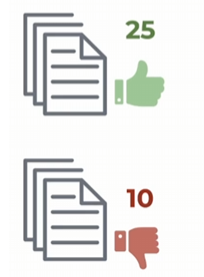

У нас 25 положительных и 10 отрицательных отзывов. 

* На основе этих чисел, далее будут вычисляться вероятности для каждого из классов.

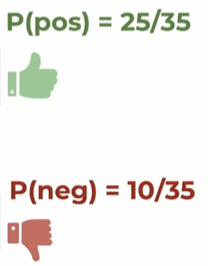

Если мы случайным образом берем из набора какой-то один отзыв, то вероятность того, что этот один отзыв будет положительным равна $\frac{25}{35}$, а вероятность того, что этот отзыв будет отрицательным $\frac{10}{35}$

* Следующий шаг - вычисление векторизации слов. Для этого берутся отдельные слова и подсчитывается сколько раз то или иное слово встретилось в документе:

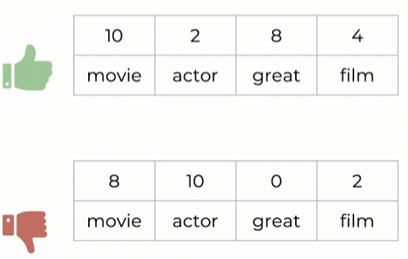

На основе этих данных можно сразу сказать, что если в отзыве встречается слово *great*, то с **большой вероятностью** - это положительный отзыв.  
В отрицательных отзывах, возможно, люди часто жалуются на актёров. Так что если слово *actor* встречается очень часто, то это большая **вероятность** того, что это отрицательный отзыв.

Однако, отдельные слова могут встречаться в различных комбинациях в одном и том же отзыве. Так что нужно учесть не просто отдельные слова, а комбинации из слов. Для этого можно **вычислить условные вероятности для классов и для слов**.

Например, вычислим вероятность того, что слово *movie* встречается в положительном отзыве.

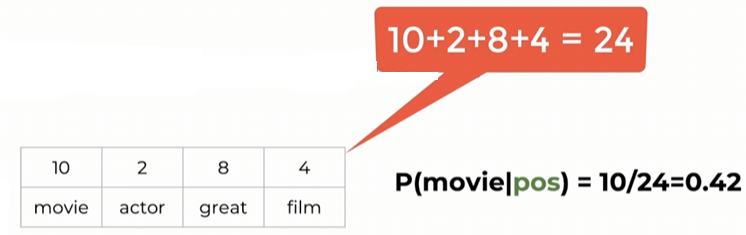

Далее можно вычислить такие вероятности для каждого слова в положительных отзывах:

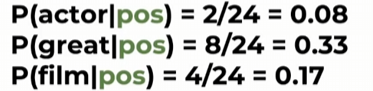

Это **условные вероятности для отдельных слов при условии, что отзыв положительный.**

Затем, такие же вероятности для отдельных слов вычисляются для отрицательных отзывов:

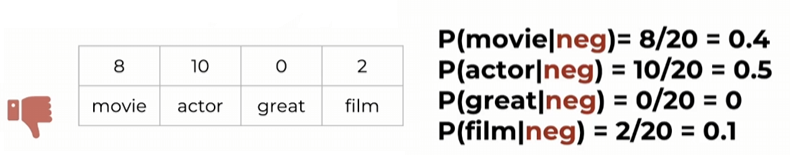

Здесь, для слова *great* мы получили **нулевую** вероятность.

Допустим, к нам приходит новый отзыв, который, для простоты изложения, состоит из двух слов *movie actor*. Ранее мы видили, что слово *movie* встречается примерно одинаково как в положительных, так и в отрицательных отзывах. Слово же *actor*, встречается чаще в отрицательных отзывах.  
Интуитивно можно сказать, что этот отзыв ближе к отрицательным. Посмотрим, что в такой ситуации покажет Наивный Байесовски классификатор:
* Вычислим вероятность того, что этот отзыв относится к положительному классу:

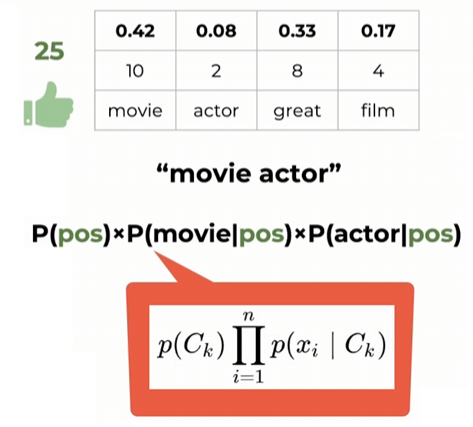

Мы берём вероятности класса <span style="color:green">positive</span> и умножаем на вероятности отдельных признаков при условии, что класс равен <span style="color:green">positive</span>. Умножая эти числа друг на друга получим следующий результат:

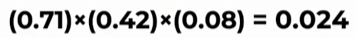

Это значение пропорционально вероятности того, что отзыв положительный при условии, что отзыв равен *movie actor*:

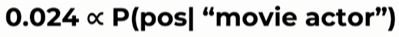

После этого, все шаги повторяются для отрицательного класса *(если классов больше - то вычисления выполняются для каждого из них)*:

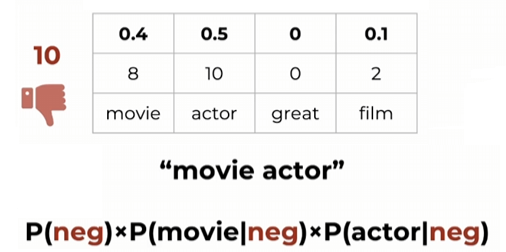

Получаем следующее значение:

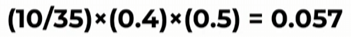

Оно пропорционально вероятности того, что класс отрицательный при условии, что отзыв равен *movie actor*:

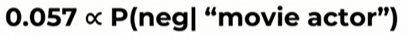

Мы получили значения того, с какой вероятностью отзыв относится к обоим классам:

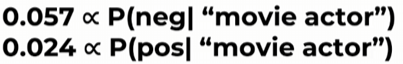

При их сравнении мы видим, что вероятность для отрицательного класса выше. Это соответствует нашему интуитивному предположению, которое было сделано ранее с учётом того, что слово *actor* чаще встречается в отрицательных отзывах.

Что будет, если мы получим на вход отзыв *great movie*?

При вычислении вероятностей для отрицательного класса мы столкнёмся с тем, что для слова *great* вероятность будет равна нулю. Это приведёт к тому, что всё произведение вероятностей для отрицательного класса станет равным нулю:

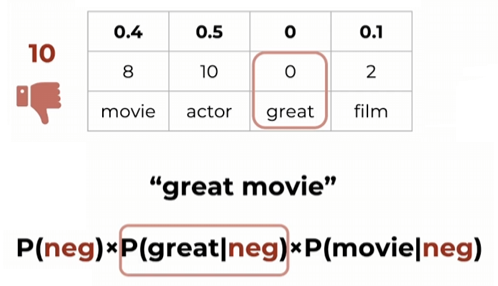

Причём, в данном случае уже будет не важно то, как часто встречаются другие слова в этом тексте. **Если одно слово имеет нулевое количество, то весь остальной текст уже не влияет на результат.**

Для решения этой проблемы можно добавить специальный параметр $\alpha$, который будет сглаживать эту ситуацию:

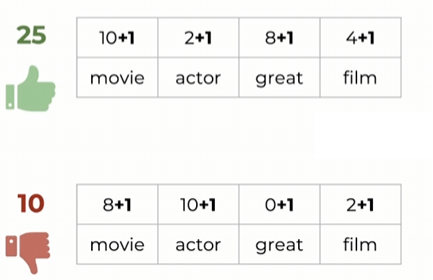

Добавляется некоторое число ко всем счётчикам, к примеру +1 для всех слов. В таком случае, даже если какое-то слово ни разу не встретилось в тексте, то это не приведёт к обнулению вероятности. Вместо этого будет достаточно маленькое число, но всё же не ноль.

**Важно:** большие значения $\alpha$ будут сглаживать слова, уменьшая разницу между отдельными словами.

---

# Извлечение признаков из текстовых данных
---

Большинство классических алгоритмов машинного обучения не могут принимать на вход сырые текстовые данные. Для начала следует выполнить *извлечение* признаков из текста, чтобы передать уже числовые признаки в алгоритм машинного обучения.

Основные методы извлечения признаков:
* Векторизация счётчиков слов(Count Vectorization) - простой подсчёт того, сколько раз то или иное слово встречается в документе.
* TF-IDF(Term Frequency - Inverse Document Frequency)

## Векторизация счётчиков слов(Count Vectorization) 

В качестве примера рассмотрим три документа, в каждом документе содержится всего одна фраза:

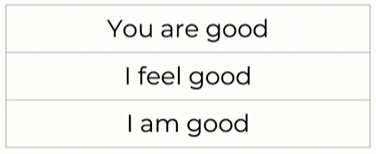

**Цель - создать вектора с признаками на основе этих слов.** 

В методе векторизации счётчиков слов **первый шаг** - это **создать словарь всех встречающихся слов.** В нашем случае, в трёх документах содержится шесть различных слов. Причём, некоторые слова могут встречаться не во всех документах, а только в отдельных документах. В итоге можно создать матрицу:

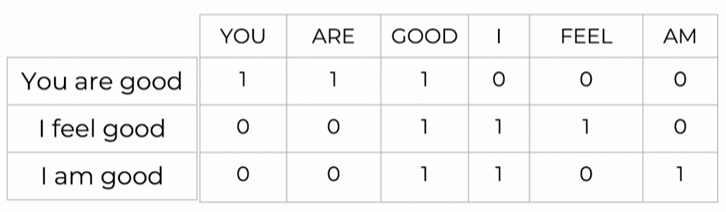

Здесь по вертикали отложены слова(шесть слов), а по горизонтали - отложены документы(три документа). Внутри матрицы записано - сколько раз то или иное слово встретилось в том или ином документе. Это делается для всех слов, которые встречаются хотя бы в одном из этих документов.

**В этой матрице может получиться очень много нулей!** Если документы достаточно длинные и общий словарь отдельных слов очень большой, то в такой матрице может быть очень много нулей, т.к. мало вероятно, что в каком-то одном документе встретятся все возможные слова.

В Scikit-Learn для метода Count Vectorization на вход подаётся список из текстовых значений:

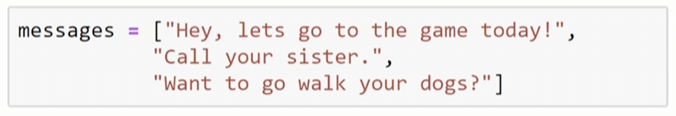

А на выходе получается матрица следующего вида:

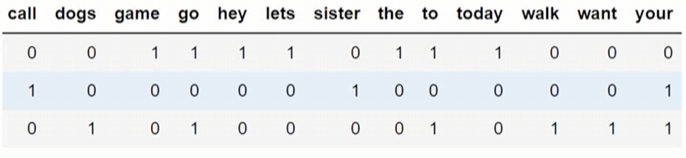

Такая матрица называется **Document Term Matrix(DTM)**. В матрице кроме 0 и 1 могут быть и другие значения при условии, что какое-то слово встречается в документе несколько раз. Векторизация счётчиков слов создаёт признак для каждого слова, а счётчик "сколько раз встретилось слово" характеризует "силу" признака/слова. Это можно рассматривать как весовой коэффициент для того или иного признака.

Для больших документов матрицы хранятся как **разреженные** для экономии ресурсов компьютера.

**На что обратить внимание:**
* Частые слова, такие как "a", "the", "about"
* Слова, частые в целом наборе документов - например, слово "run" в наборе спортивных статей

*Для первого случая:*  
**Стоп-слова** - это слова, которые встречаются в языке настолько часто, что их можно безопасно удалить из рассмотрения. Большинство библиотек NLP имеют встроенные списки стоп-слов.

*Для второго случая:*  
Чтобы учесть частоту слов во всех документах, можно применить **процесс векторизации TF-IDF**. В этом случае в матрицу DTM пишется не просто частота слов, а для каждого слова вычисляется значение "term frequency-inverse document frequency", т.е. как часто то или иное слово встречается в целом наборе документов.

### Вычисление TF-IDF

**Term Frequency tf(t,d)**: сколько раз слово t встречается в документе d. Эти счётчики подсчитываются отдельно для каждого документа. Однако, метрика "Term Frequency" сама по себе недостаточна для анализа текста.

Также необходимо учитывать ситуации, когда какие-то слова встречаются во всём наборе документов, но они не являются стоп-словами.

**Множитель Inverse Document Frequency** позволяет уменьшить вес слов, которые встречаются часто в наборе документов, а также увеличить вес тех слов, которые встречаются редко. 

Вычисляется IDF так: берётся общее количество документов, делится на количество документов, в которых содержится рассматриваемое слово, и затем берётся логарифм этой дроби, в итоге получается **множитель IDF**.  
Этот множитель говорит о том, как часто или редко встречается слово во всём наборе документов. **Чем ближе IDF к 0, тем чаще встречается слово.** 

$$TF-IDF = term frequency *(1/document frequency)$$
$$TF-IDF = term frequency * inverse document frequency)$$

$$tfidf(t,d,D)=tf(t,D)*idf(t,D)$$
$$idf(t,D)=\log{\frac{N}{|{d\in D : t\in d}|}}$$

**TF-IDF позволяет понять слова в контексте всего набора слов во всех документах, а не только в одном документе.**

---